centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.95008863 0.99282586 0.99680511 0.96155838 0.89118789 0.79358073]
 [0.90370708 0.96923323 0.99875078 0.98881304 0.94058806 0.85963276]
 [0.80428628 0.89960455 0.96676484 0.99820162 0.99024786 0.9438387 ]
 [0.67895529 0.79358073 0.89118789 0.96155838 0.99680511 0.99282586]]
Score on training data =  0.8984889415527032
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


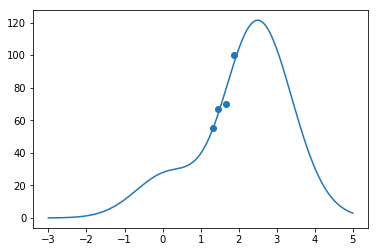

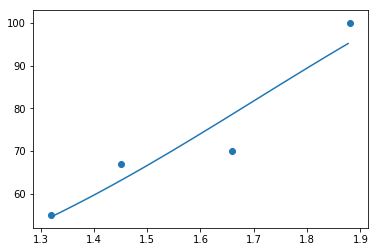

In [19]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 2 # increase -> increase influce of each datapoint
alpha = 0.0001 # increase -> more regularization, simpler line of fit

# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()

## Pre-class work

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

years = range(2011, 2017)
files = ['CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt('yosemite_village/' + f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000

x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]

In [153]:
data.shape

(631296, 3)

In [173]:
import pandas as pd

pd.DataFrame(data).drop([0], axis=1)

,1,2
0,5.0,-6.4
1,10.0,-6.5
2,15.0,-6.5
3,20.0,-6.5
4,25.0,-6.7
5,30.0,-6.6
6,35.0,-6.7
7,40.0,-6.9
8,45.0,-7.0
9,50.0,-6.9


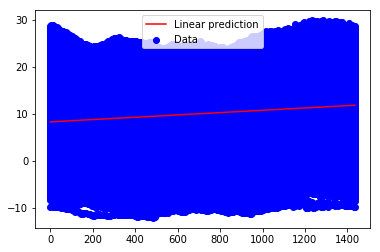

In [33]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [140]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

sigma = 1e3 # increase -> increase influence of each datapoint

rbf_centers = np.linspace(x_train.min(), x_train.max(), 48).reshape(-1, 1)
new_x_train = rbf_kernel(x_train, rbf_centers, gamma=1 / sigma)
print(new_x_train)

[[0.97530991 0.52106594 0.04314654 ... 0.         0.         0.        ]
 [0.90483742 0.65602293 0.07371753 ... 0.         0.         0.        ]
 [0.79851622 0.78565275 0.11980661 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.04314654 0.52106594 0.97530991]
 [0.         0.         0.         ... 0.02402185 0.3936875  1.        ]
 [1.         0.3936875  0.02402185 ... 0.         0.         0.        ]]


In [144]:
alpha = 0.001 # increase -> more regularization, simpler line of fit

ridge_regr = Ridge(alpha=alpha, fit_intercept=False)
ridge_regr.fit(new_x_train, y_train)
print("Score on training data = ", ridge_regr.score(new_x_train, y_train))

Score on training data =  0.04439391027889239


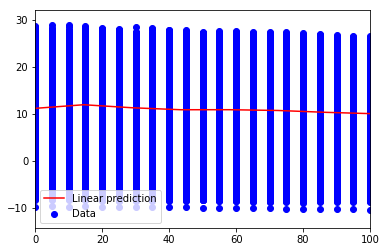

In [149]:
x_predict = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)
all_x = rbf_kernel(x_predict, rbf_centers, gamma=1.0 / sigma)
y_predict = ridge_regr.predict(all_x)

plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='b')
plt.xlim((0, 100))
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

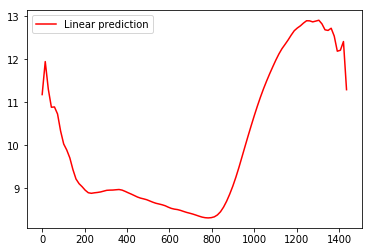

In [146]:
plt.plot(x_predict, y_predict, label='Linear prediction', color='r')
plt.legend(loc='best')
plt.show()

In [104]:
y_predict

array([11.93979043, 11.93762598, 11.93546231, 11.93329918, 11.93113652,
       11.92897439, 11.92681317, 11.92465227, 11.9224919 , 11.92033238])